In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("D:/data/HR-Employee-Attrition.csv",header=0)
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.duplicated().sum()

0

#### From the EDA we saw some of the features were having very low standard deviation, so we will remove those features.

In [6]:
data.drop("Over18",axis=1,inplace=True)
data.drop("EmployeeCount",axis=1,inplace=True)
data.drop("EmployeeNumber",axis=1,inplace=True)
data.drop("StandardHours",axis=1,inplace=True)
data.drop("Education",axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

### Checking the outliers

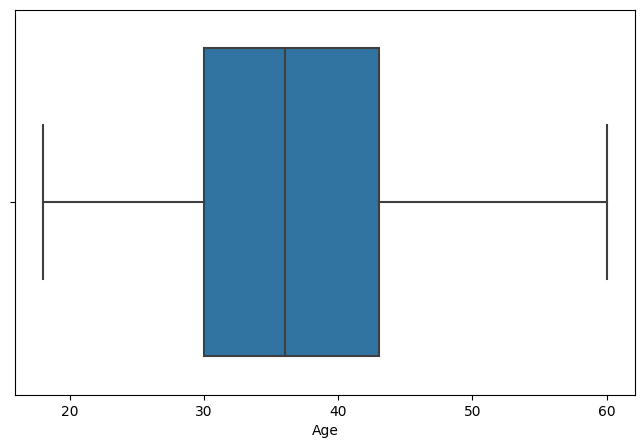

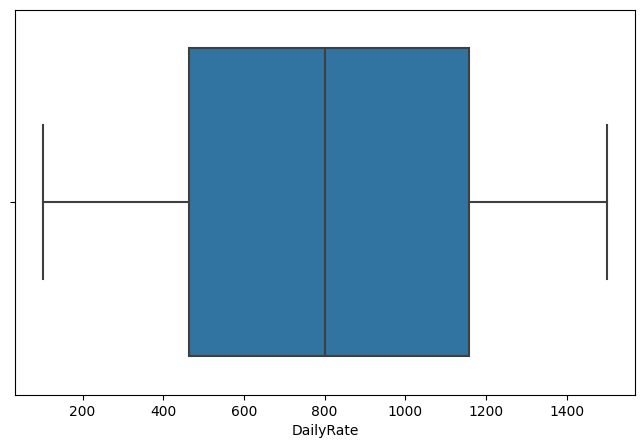

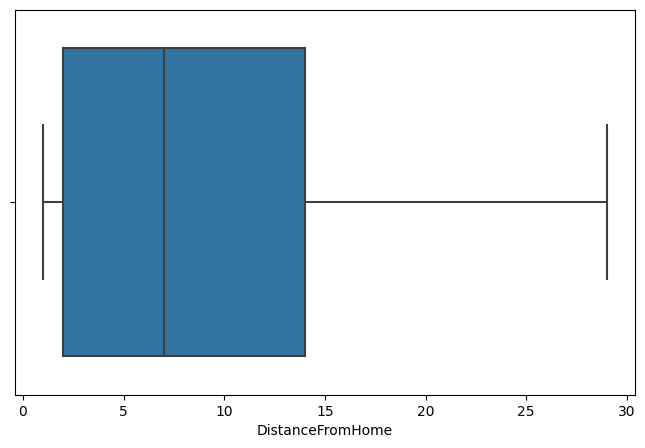

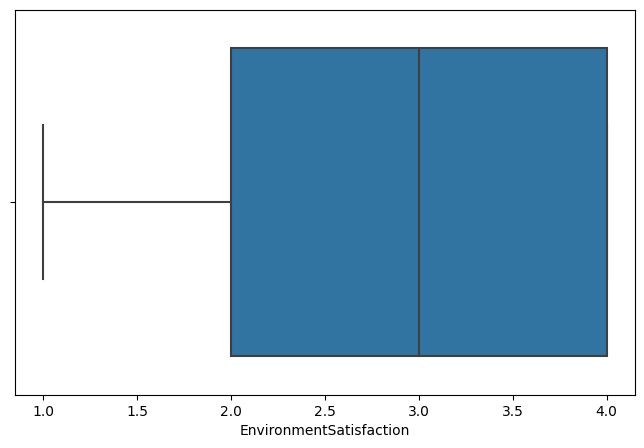

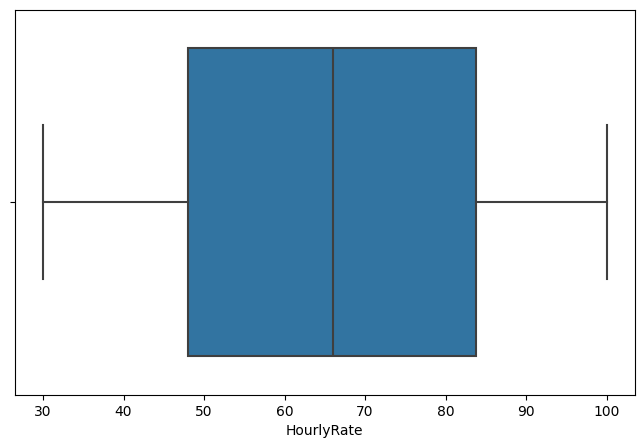

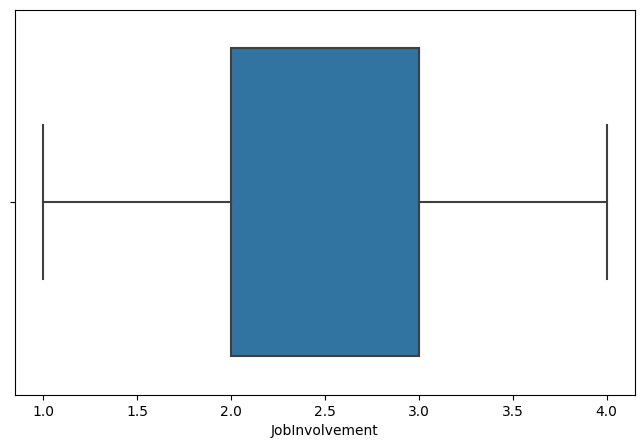

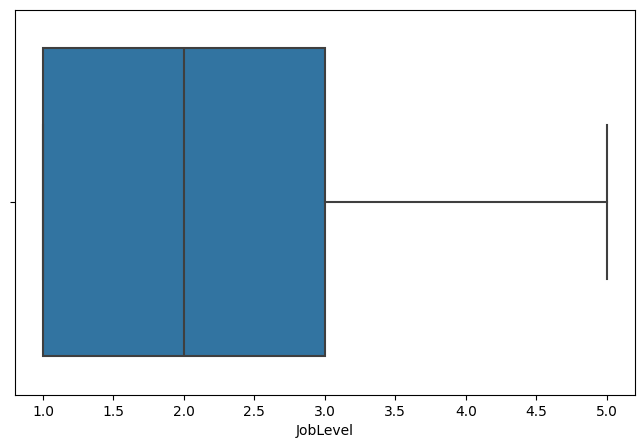

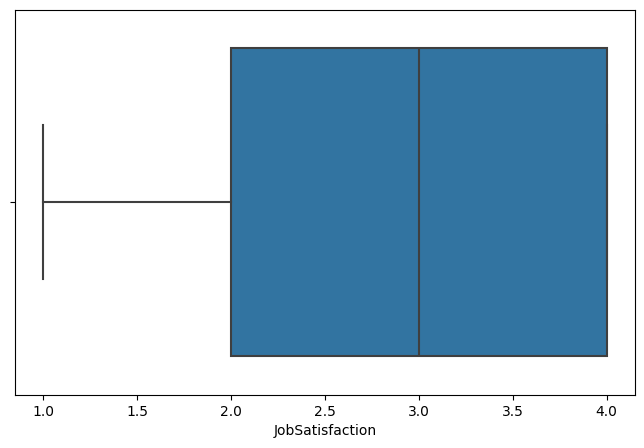

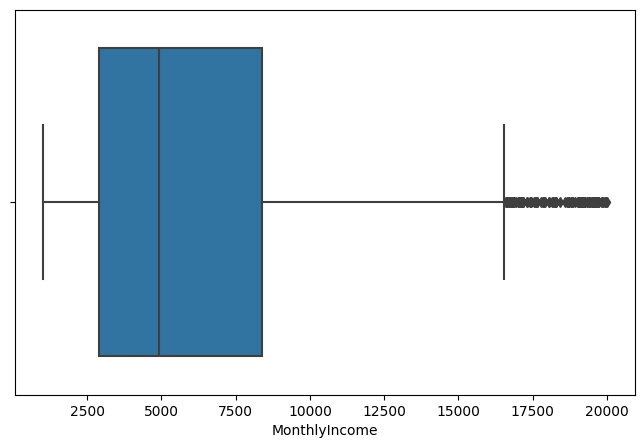

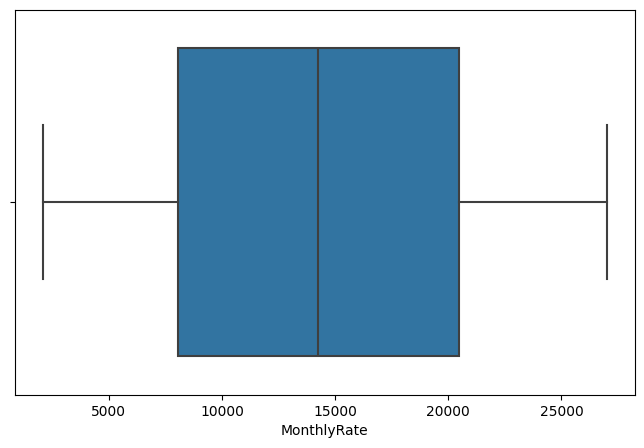

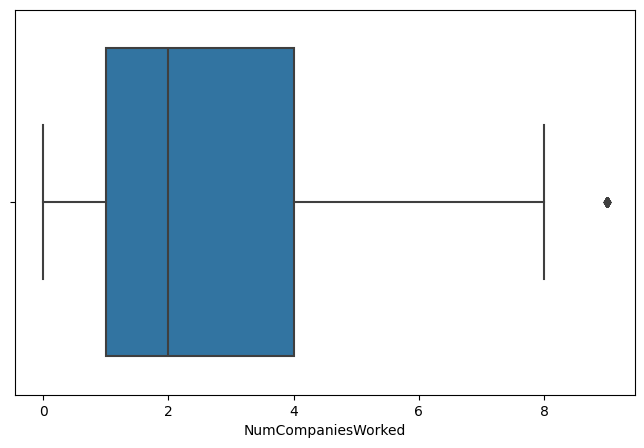

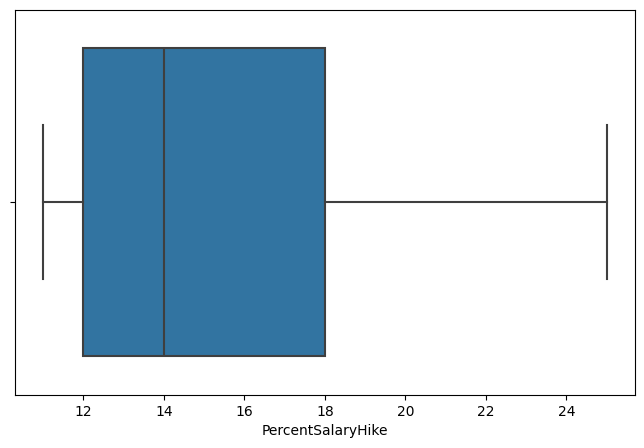

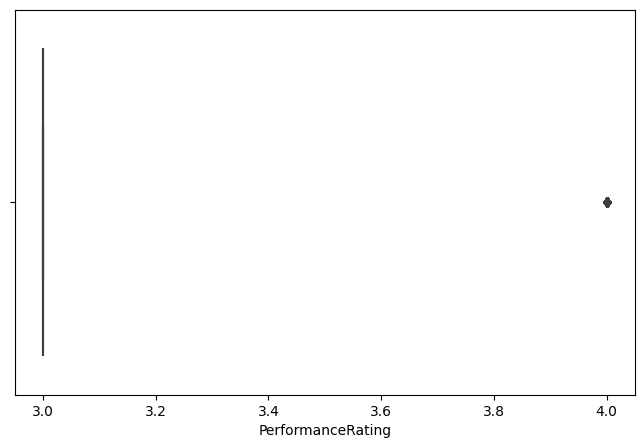

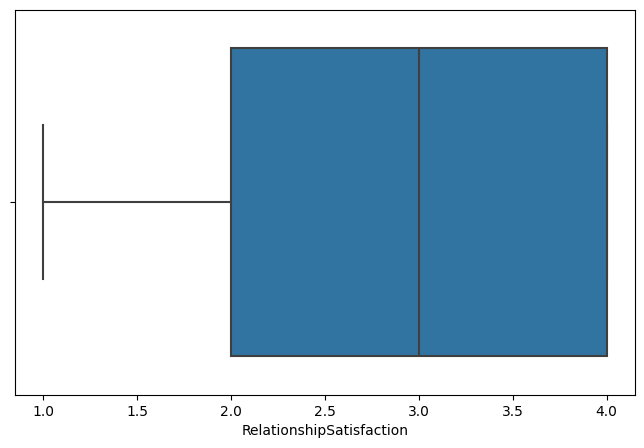

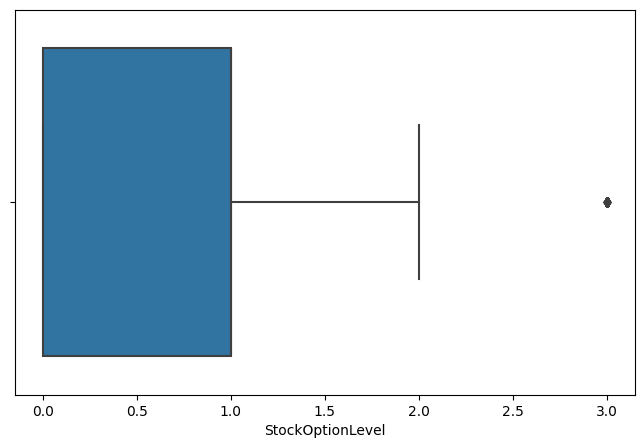

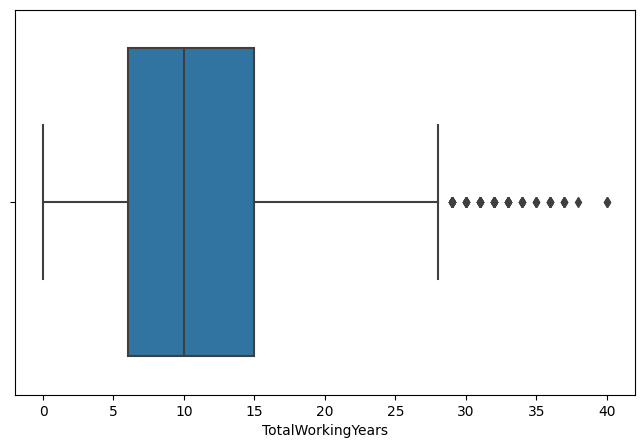

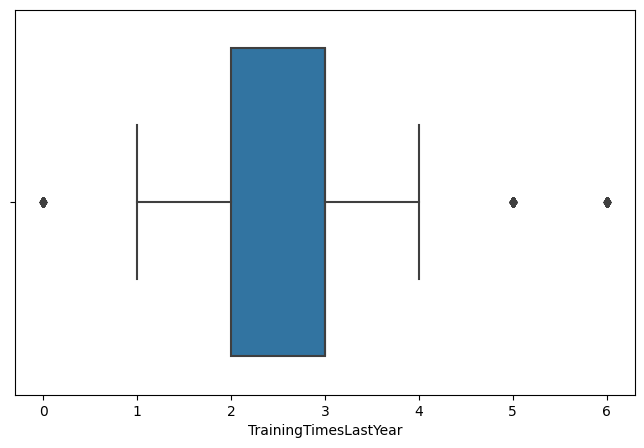

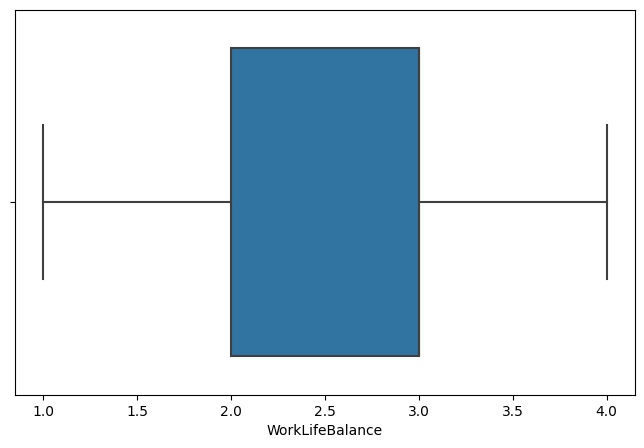

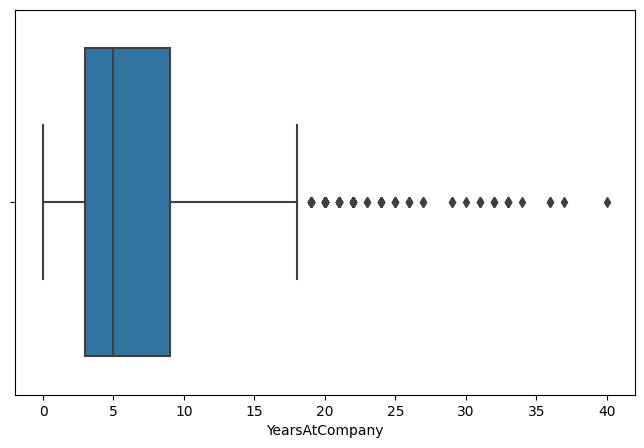

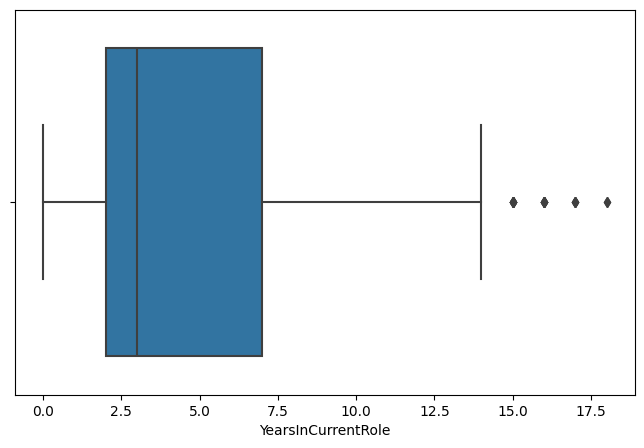

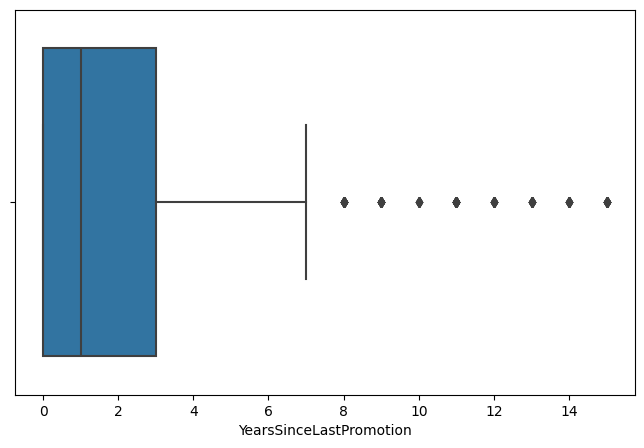

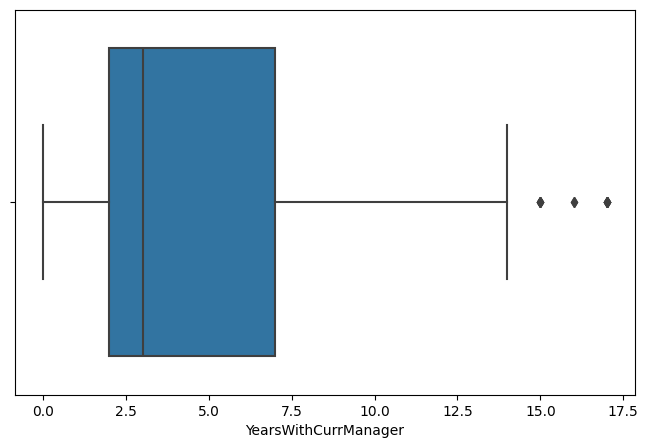

In [8]:
for col in data.columns:
    if data[col].dtypes != 'object':
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data,x=col)
        plt.xlabel(col)
        plt.show()

* We do see skweness in our features

In [9]:
num_cols = data[['Age','DailyRate','DistanceFromHome','HourlyRate',
                 'MonthlyIncome','MonthlyRate','NumCompaniesWorked',
                 'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                 'YearsWithCurrManager']]


outlier_count = {}

for col in num_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count[col] = len(outliers)
    
for col, count in outlier_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in Age: 0
Number of outliers in DailyRate: 0
Number of outliers in DistanceFromHome: 0
Number of outliers in HourlyRate: 0
Number of outliers in MonthlyIncome: 114
Number of outliers in MonthlyRate: 0
Number of outliers in NumCompaniesWorked: 52
Number of outliers in PercentSalaryHike: 0
Number of outliers in TotalWorkingYears: 63
Number of outliers in TrainingTimesLastYear: 238
Number of outliers in YearsAtCompany: 104
Number of outliers in YearsInCurrentRole: 21
Number of outliers in YearsSinceLastPromotion: 107
Number of outliers in YearsWithCurrManager: 14


In [10]:
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1456 non-null   int64 
 1   Attrition                 1456 non-null   object
 2   BusinessTravel            1456 non-null   object
 3   DailyRate                 1456 non-null   int64 
 4   Department                1456 non-null   object
 5   DistanceFromHome          1456 non-null   int64 
 6   EducationField            1456 non-null   object
 7   EnvironmentSatisfaction   1456 non-null   int64 
 8   Gender                    1456 non-null   object
 9   HourlyRate                1456 non-null   int64 
 10  JobInvolvement            1456 non-null   int64 
 11  JobLevel                  1456 non-null   int64 
 12  JobRole                   1456 non-null   object
 13  JobSatisfaction           1456 non-null   int64 
 14  MaritalStatus           

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1456 non-null   int64
 1   Attrition                 1456 non-null   int32
 2   BusinessTravel            1456 non-null   int32
 3   DailyRate                 1456 non-null   int64
 4   Department                1456 non-null   int32
 5   DistanceFromHome          1456 non-null   int64
 6   EducationField            1456 non-null   int32
 7   EnvironmentSatisfaction   1456 non-null   int64
 8   Gender                    1456 non-null   int32
 9   HourlyRate                1456 non-null   int64
 10  JobInvolvement            1456 non-null   int64
 11  JobLevel                  1456 non-null   int64
 12  JobRole                   1456 non-null   int32
 13  JobSatisfaction           1456 non-null   int64
 14  MaritalStatus             1456 non-null 

In [13]:
x = data.drop('Attrition',axis=1)
y = data['Attrition']

### Checking for multicollinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

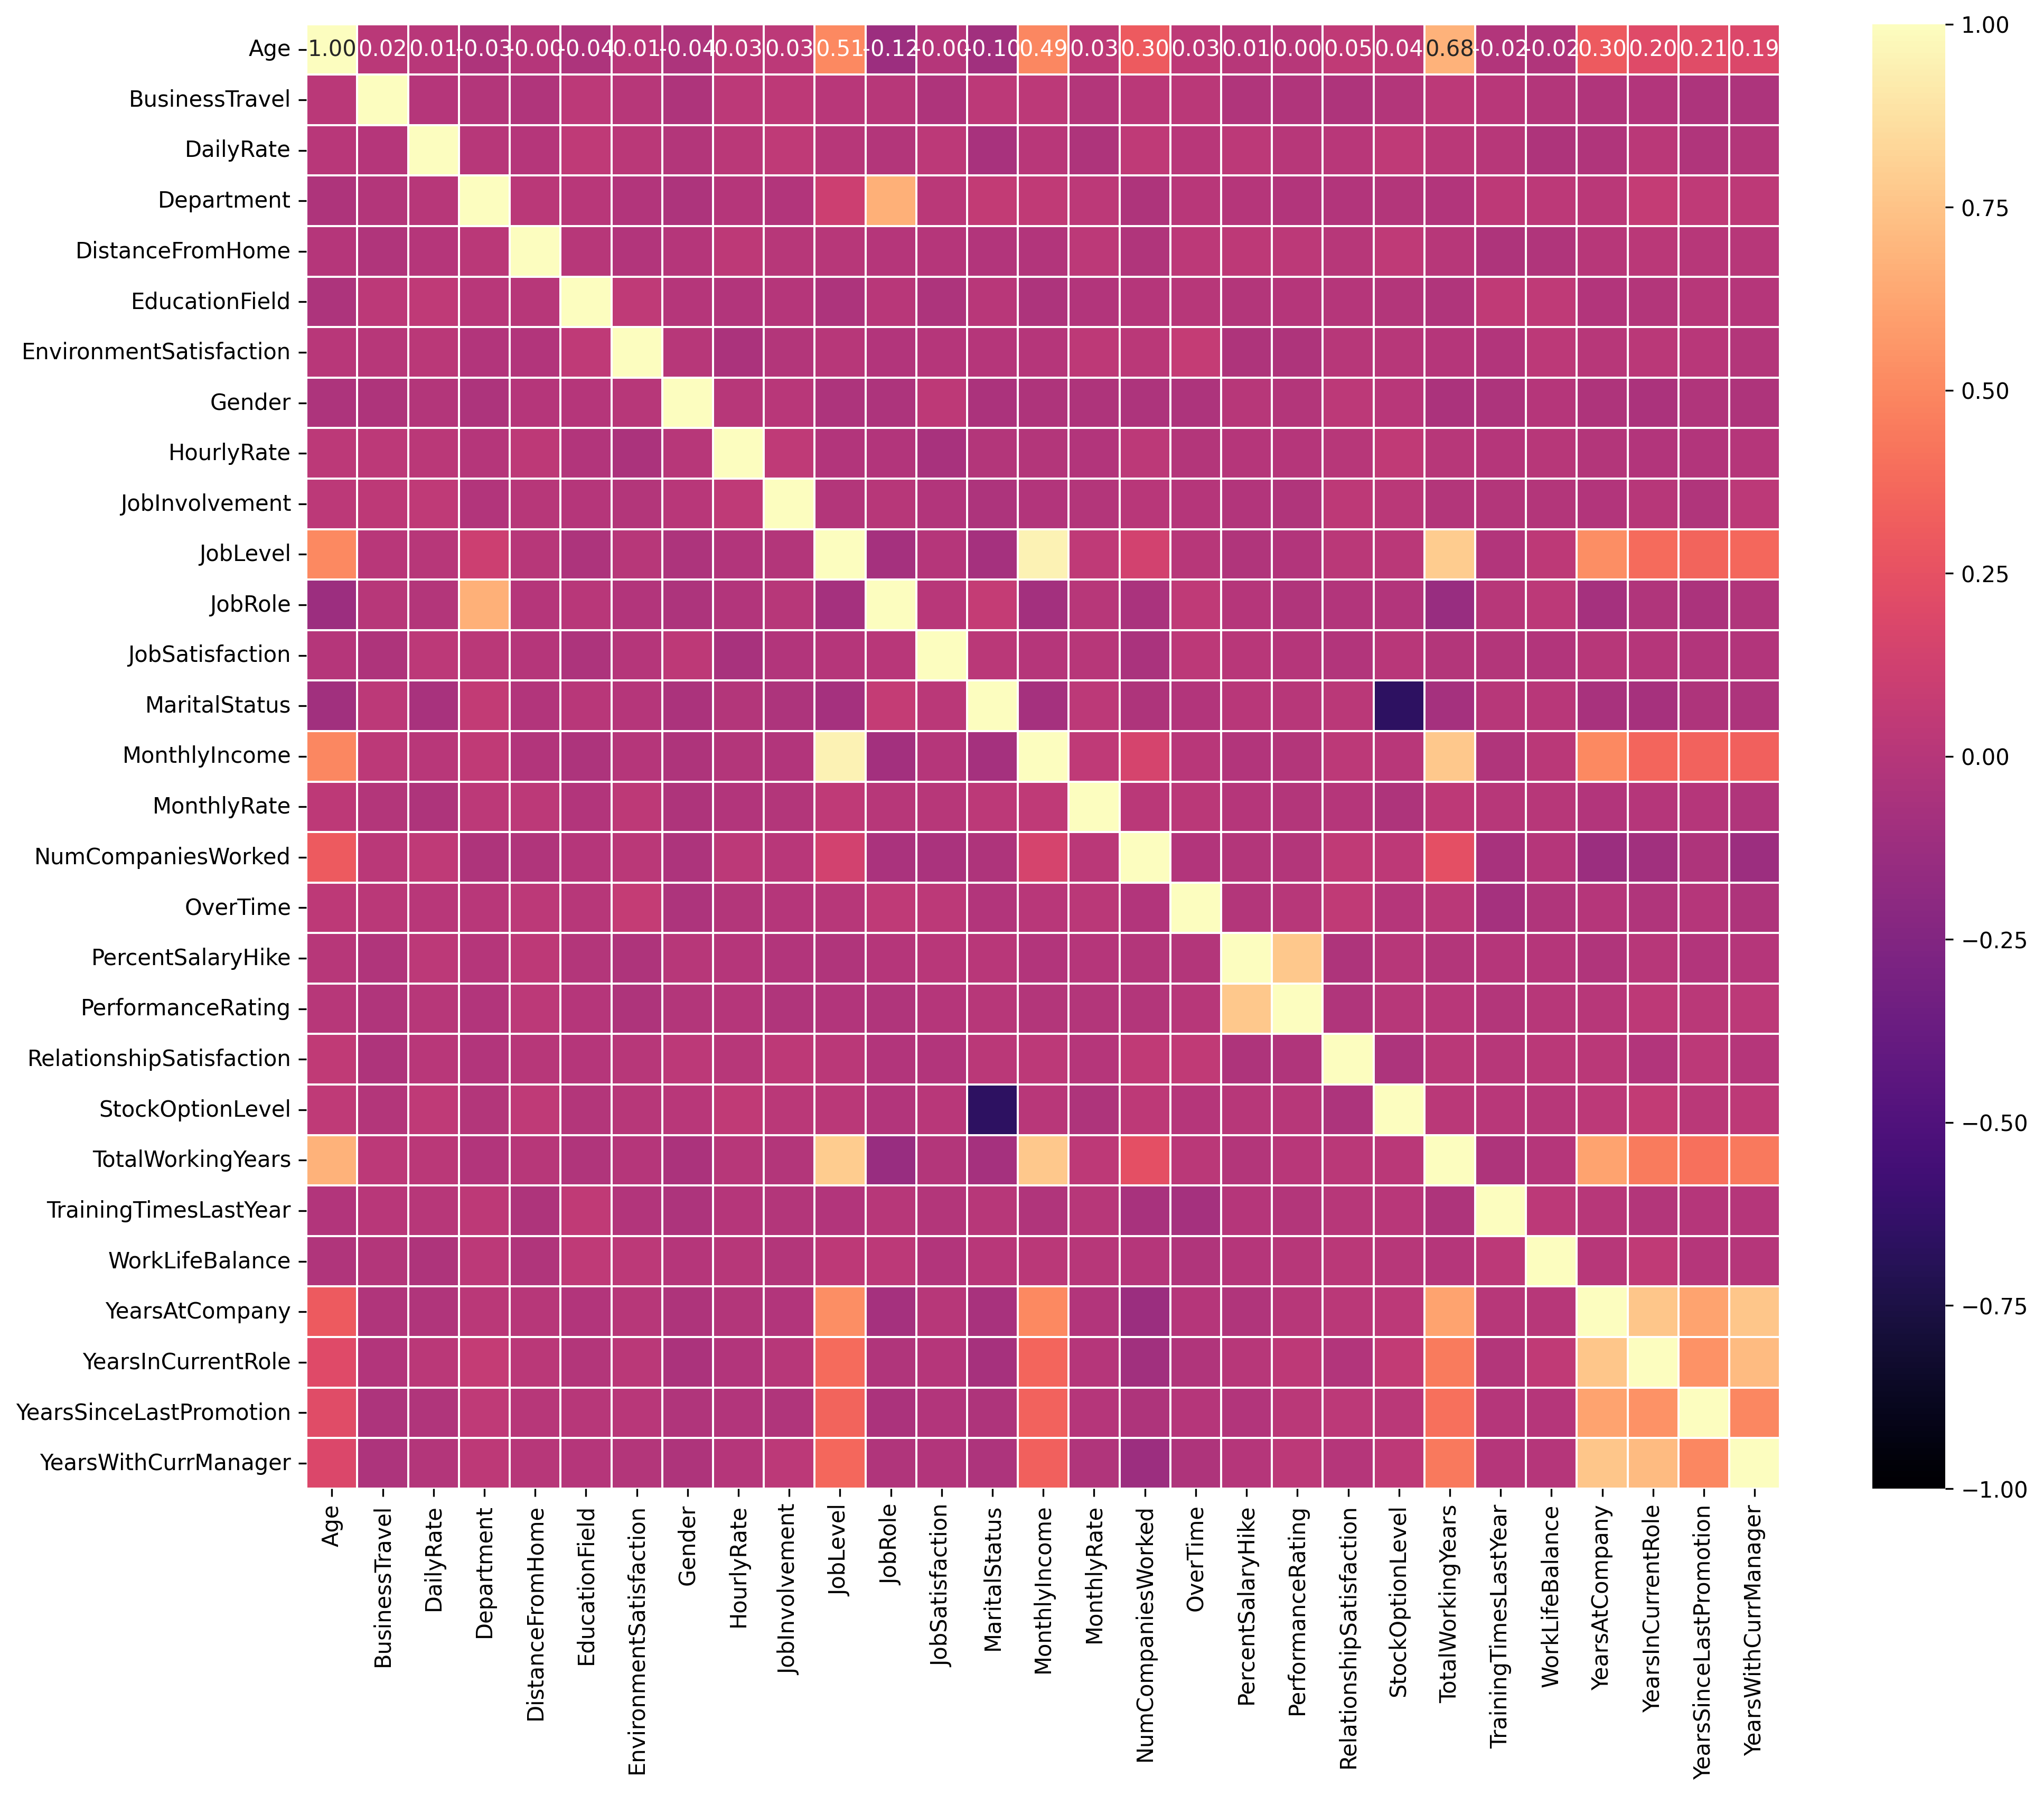

In [15]:
corr_matrix = x.corr()
plt.figure(figsize=(15, 12),dpi=300)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma", vmax=1, vmin=-1, linewidths=.5)
plt.show()

* Some of the independent variables are correlated amoung themselfs.

#### We will use vriance inflation factor for checking multicollinearity


- VIF = 1 / 1 - R^2

In [16]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = x.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,columns,VIF_values
0,Age,31.836572
1,BusinessTravel,6.691916
2,DailyRate,4.993850
3,Department,13.113556
4,DistanceFromHome,2.313303
5,EducationField,3.865658
6,EnvironmentSatisfaction,7.118227
7,Gender,2.506575
8,HourlyRate,11.283323
9,JobInvolvement,14.943809


### First we will run the model with multicollinearity and see the effects then we will remove highly correlated columns and then check the effects

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1456 non-null   int64
 1   BusinessTravel            1456 non-null   int32
 2   DailyRate                 1456 non-null   int64
 3   Department                1456 non-null   int32
 4   DistanceFromHome          1456 non-null   int64
 5   EducationField            1456 non-null   int32
 6   EnvironmentSatisfaction   1456 non-null   int64
 7   Gender                    1456 non-null   int32
 8   HourlyRate                1456 non-null   int64
 9   JobInvolvement            1456 non-null   int64
 10  JobLevel                  1456 non-null   int64
 11  JobRole                   1456 non-null   int32
 12  JobSatisfaction           1456 non-null   int64
 13  MaritalStatus             1456 non-null   int32
 14  MonthlyIncome             1456 non-null 

## Decision Tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.30,stratify=y,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1019, 29), (437, 29), (1019,), (437,))

In [21]:
#Model building
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train,y_train)

dt_pred = decision_tree.predict(x_test)

In [22]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
def conf_matrix_plot(model,x_data,y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data,model_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels=model.classes_)
    disp.plot()
    plt.show()

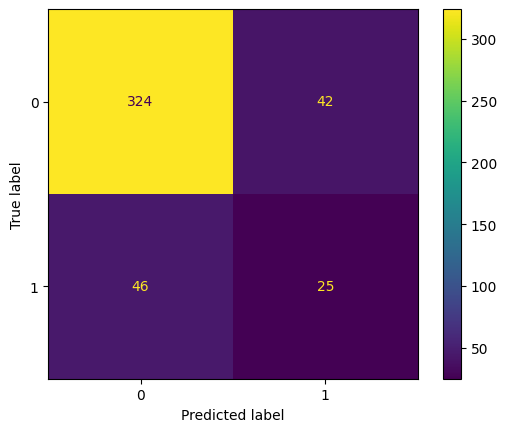

In [24]:
conf_matrix_plot(decision_tree,x_test,y_test)

In [25]:
print('Accuracy:', '%.3f' % accuracy_score(y_test,dt_pred))
print('Precision:', '%.3f' % precision_score(y_test,dt_pred))
print('Recall:', '%.3f' % recall_score(y_test,dt_pred))
print('F1 score:', '%.3f' % f1_score(y_test,dt_pred))

Accuracy: 0.799
Precision: 0.373
Recall: 0.352
F1 score: 0.362


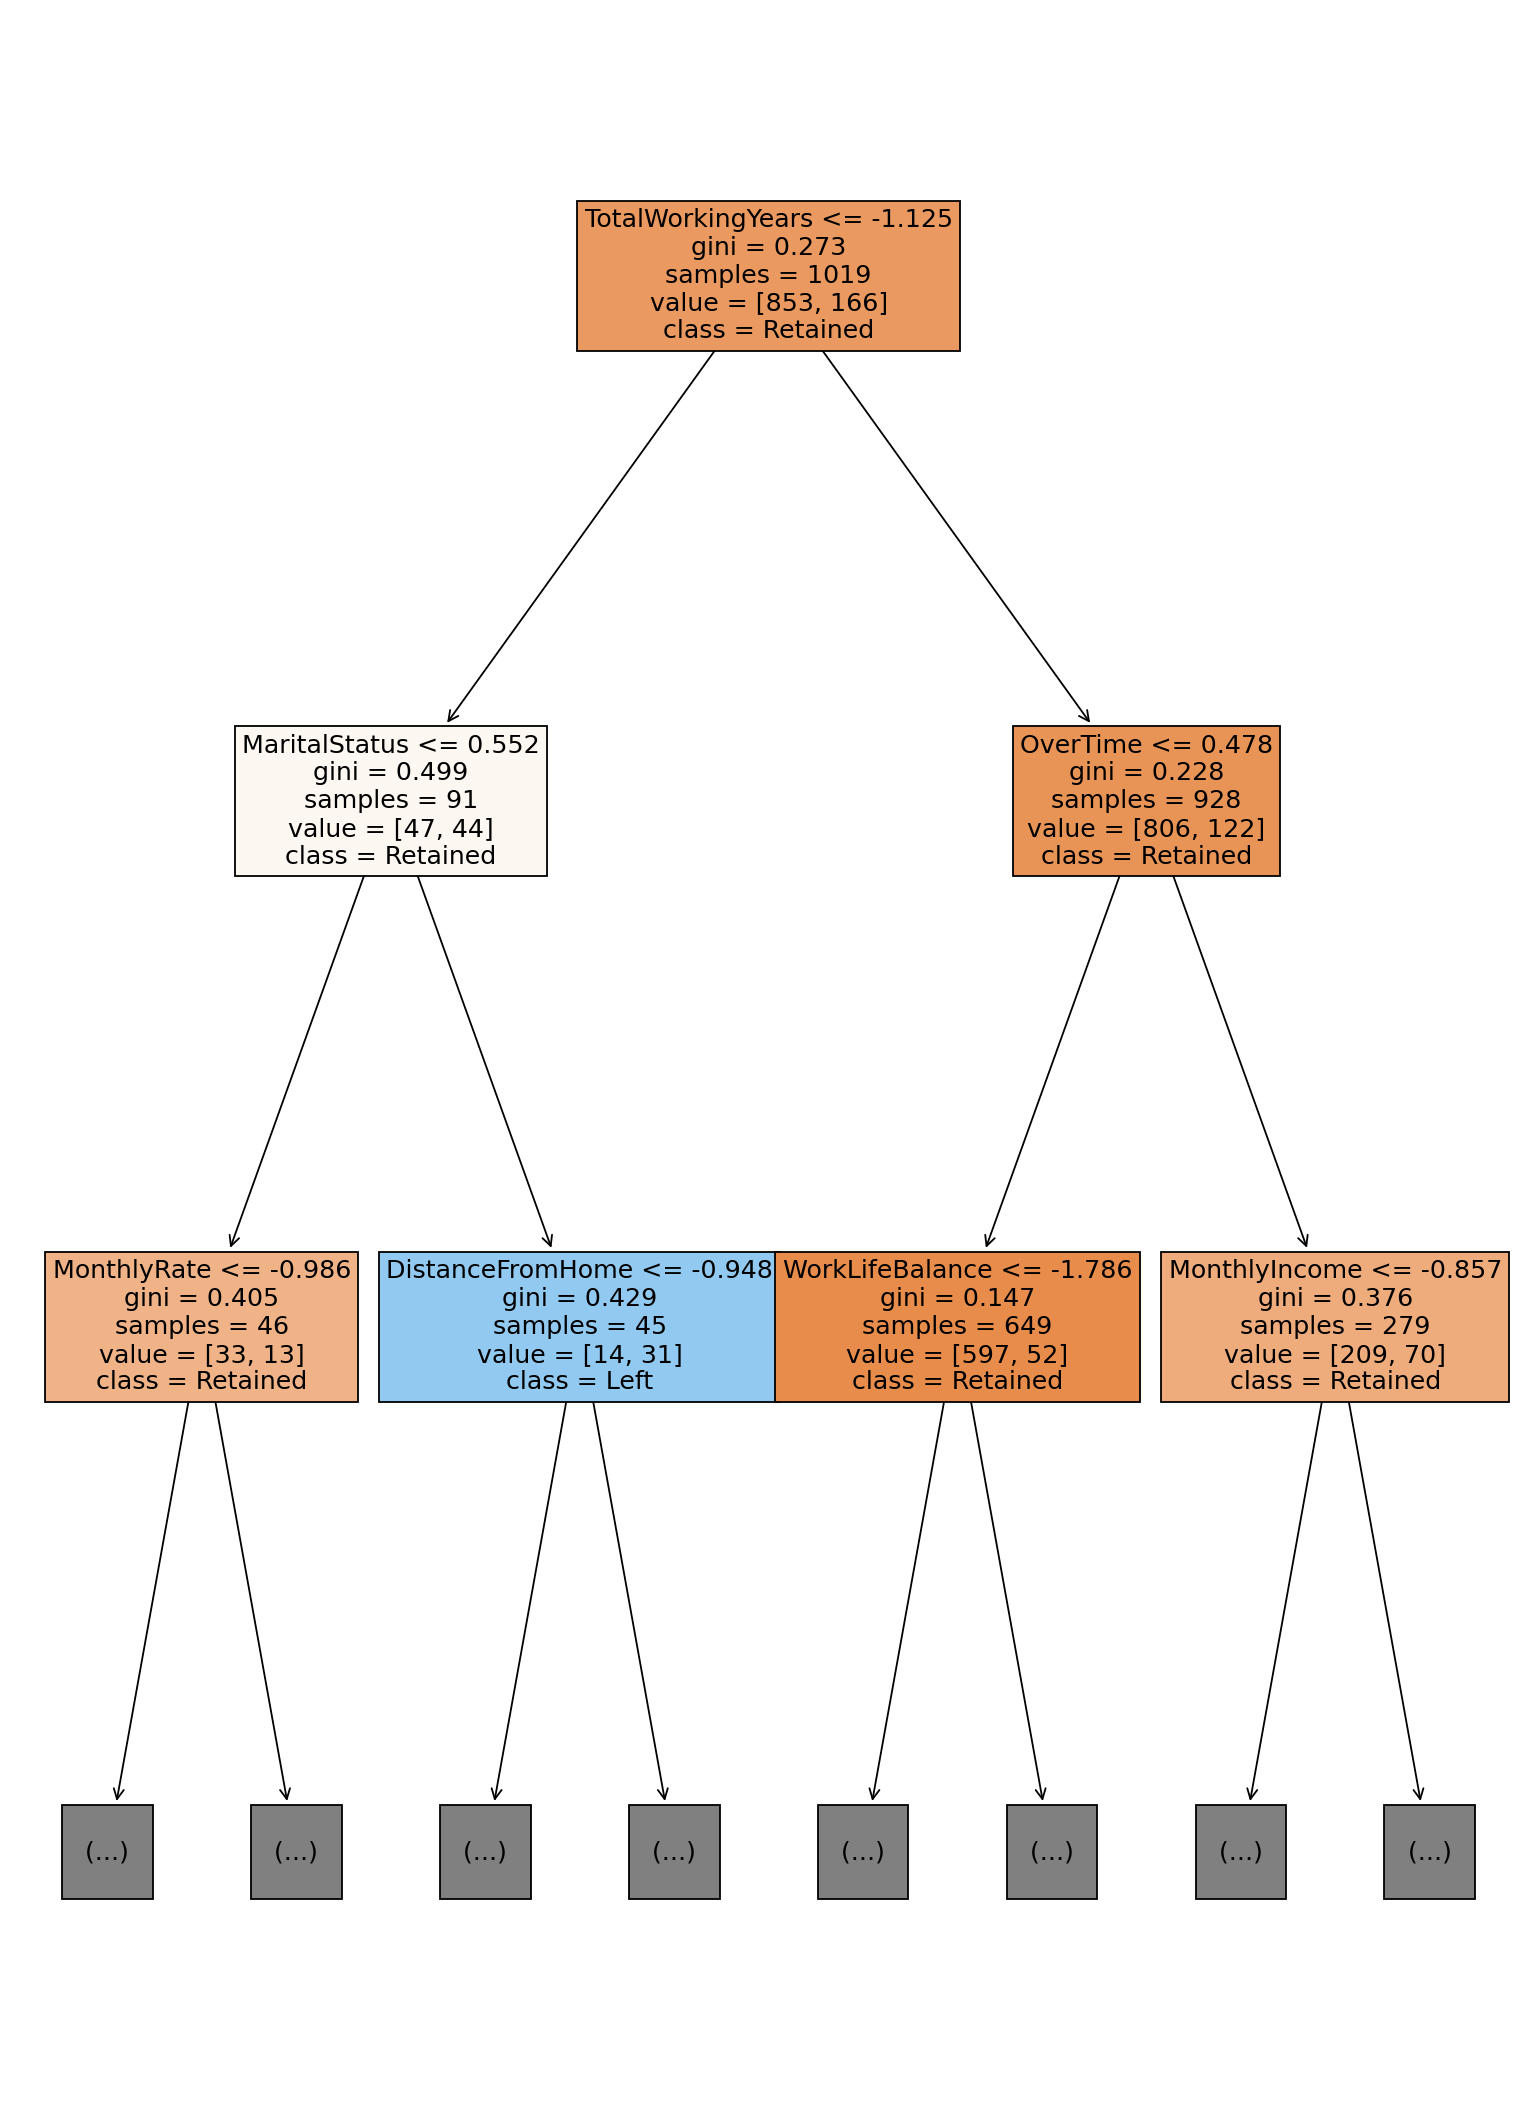

In [26]:
#PLot the tree
plt.figure(figsize=(15,21),dpi=130)
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=x.columns,
         class_names={0:'Retained',1:'Left'}, filled=True);

plt.show()

In [27]:
dt_pred_tr = decision_tree.predict(x_train)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_train,dt_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1019
   macro avg       1.00      1.00      1.00      1019
weighted avg       1.00      1.00      1.00      1019



In [29]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       366
           1       0.37      0.35      0.36        71

    accuracy                           0.80       437
   macro avg       0.62      0.62      0.62       437
weighted avg       0.79      0.80      0.80       437



* We can see that the model is overfitting the training data. The performace falls in test data

## We will check the chanegs in the F1 score for different parameters.

In [30]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    
    return f1, f2

In [31]:
def effect(train_score, test_score, x_axis,title):
    plt.figure(figsize=(5,5),dpi=120)
    plt.plot(x_axis, train_score, color ='red',label = 'train_score')
    plt.plot(x_axis, test_score, color = 'blue',label = 'test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel("Parameter_value")
    plt.ylabel("F1_score")
    plt.show()

In [32]:
maxdepth = [i for i in range(1,50)]
train=[]
test=[]

for i in maxdepth:
    model = DecisionTreeClassifier(class_weight = 'balanced',max_depth = i,random_state=42)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

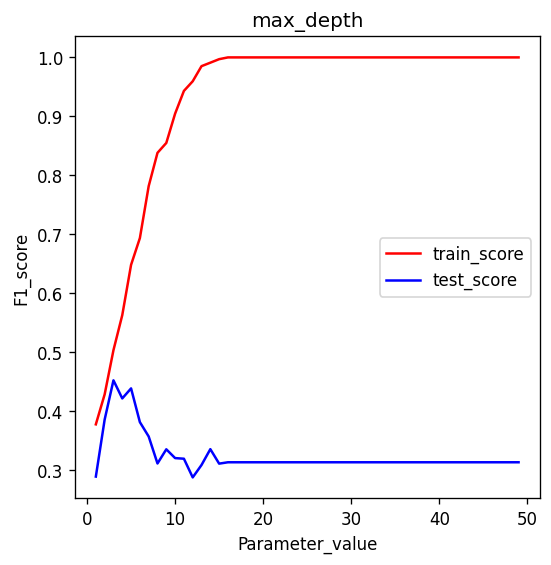

In [33]:
effect(train,test,range(1,50), 'max_depth')

* As max_depth increases the performance of the model achieves constant. So low max_depth value must be given to get best performance

In [34]:
min_samples = [i for i in range(2,400,25)]
train=[]
test=[]

for i in min_samples:
    model = DecisionTreeClassifier(class_weight='balanced',min_samples_split=i,random_state=42)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

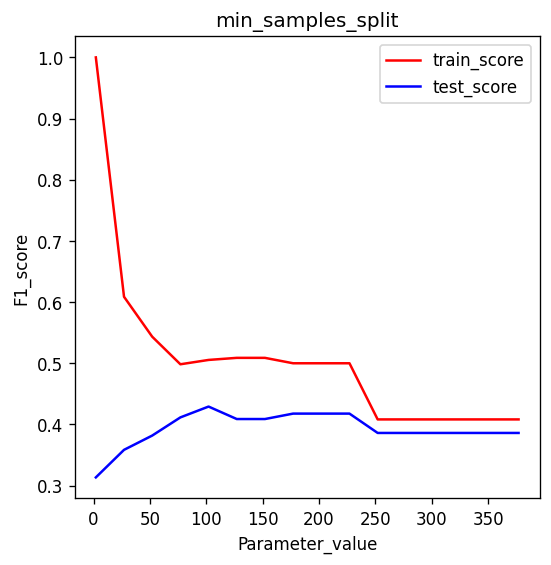

In [35]:
effect(train,test,range(2,400,25),'min_samples_split')

* min sample somewhere around 200 maty give ideal performance

In [36]:
maxleafnodes = [i for i in range(2,200,10)]
train=[]
test=[]

for i in maxleafnodes:
    model = DecisionTreeClassifier(class_weight = 'balanced',max_leaf_nodes=i,random_state=42)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

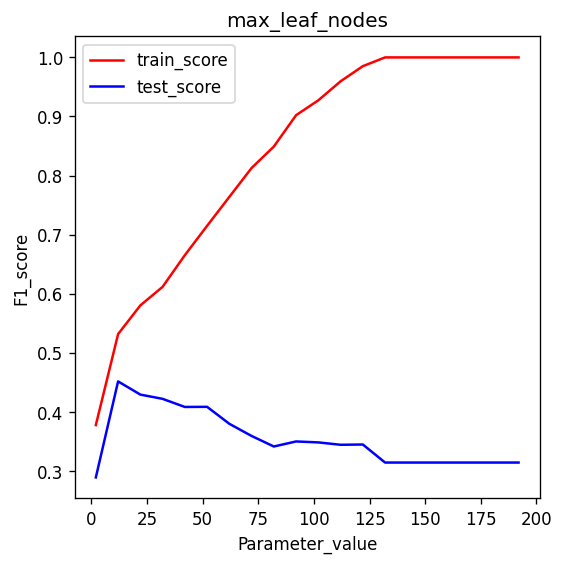

In [37]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

In [38]:
minsamplesleaf = [i for i in range(2,500,25)]
train=[]
test=[]

for i in minsamplesleaf:
    model = DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=i,random_state=42)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

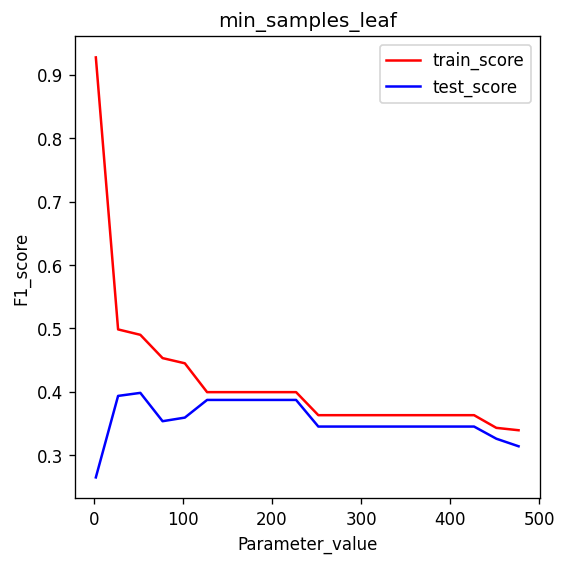

In [39]:
effect(train,test,range(2,500,25), 'min_samples_leaf')

In [40]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': range(100,200,25),
    'max_leaf_nodes': range(1,26),
    'min_samples_leaf': range(1,150,25)
}

In [57]:
# Define the scoring metrics (accuracy and f1)
from sklearn.metrics import make_scorer, accuracy_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score)}


In [58]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           cv=5, scoring=scoring, refit='accuracy')

In [59]:
# Fit the model to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': range(1, 26),
                         'min_samples_leaf': range(1, 150, 25),
                         'min_samples_split': range(100, 200, 25)},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score)})

In [60]:
# Print the best parameters and corresponding accuracy and f1 score
print("Best Parameters: ", grid_search.best_params_)
# print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))
# print("Best Cross-Validated F1 Score: {:.2f}".format(grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]))

# Evaluate the model on the test set
test_accuracy = grid_search.score(x_test, y_test)
test_f1 = f1_score(y_test, grid_search.predict(x_test))
print("Test Set Accuracy: {:.2f}".format(test_accuracy))
print("Test Set F1 Score: {:.2f}".format(test_f1))

Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 100}
Test Set Accuracy: 0.85
Test Set F1 Score: 0.25


## Random-Forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [62]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
predicted_values = classifier.predict(x_train)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1019
   macro avg       1.00      1.00      1.00      1019
weighted avg       1.00      1.00      1.00      1019



In [65]:
predicted_values_ts = classifier.predict(x_test)
print(classification_report(y_test,predicted_values_ts))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       366
           1       0.53      0.13      0.20        71

    accuracy                           0.84       437
   macro avg       0.69      0.55      0.56       437
weighted avg       0.80      0.84      0.80       437



In [66]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight = 'balanced_subsample',
                n_estimators = i,
                n_jobs= -1,
                max_depth = 7,
                random_state = 101)
    
    f1, f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

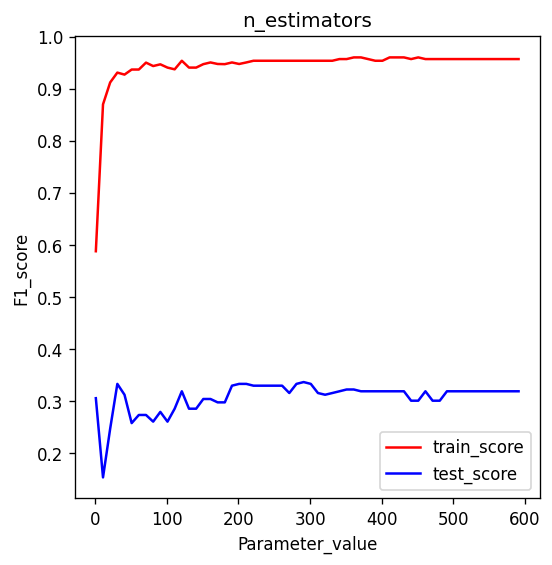

In [67]:
effect(train, test, range(1,600,10), 'n_estimators')

In [68]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:
    model = RFC(class_weight = 'balanced_subsample',n_estimators=50,
                n_jobs = -1,
                max_depth = 7,
                random_state = 101,
                max_samples = i)
    
    f1, f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

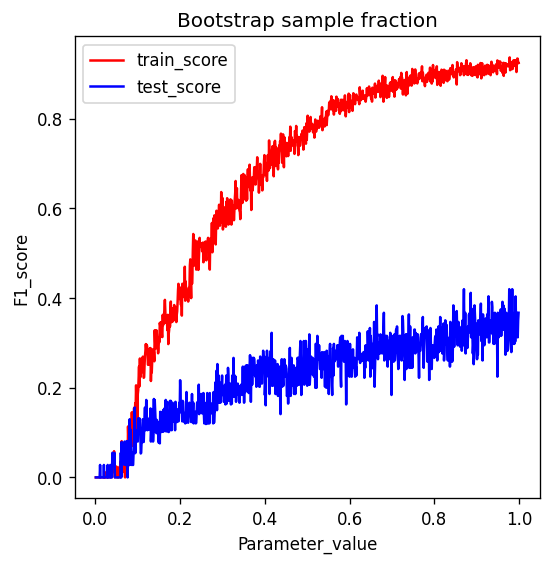

In [69]:
effect(train,test,maxsamples, 'Bootstrap sample fraction')

In [71]:
maxfeatures = range(1,x.shape[1])
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight = 'balanced_subsample',
                n_estimators = 50,
                n_jobs = -1,
                max_depth = 7,
                random_state = 101,
                max_features = i)
    
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

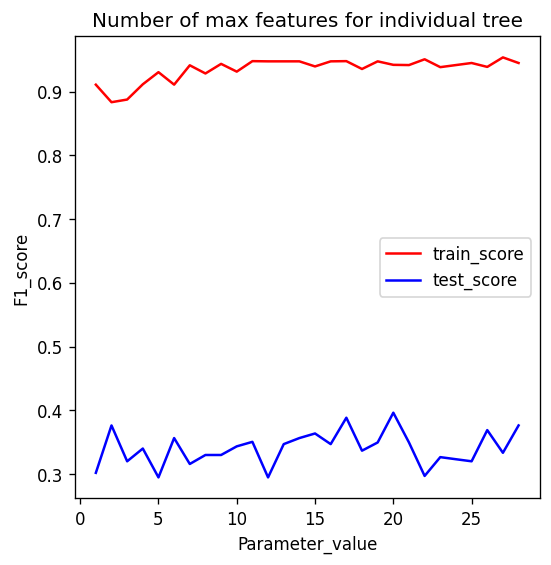

In [72]:
effect(train,test,maxfeatures,'Number of max features for individual tree')

In [78]:
param_grid = { 
    'n_estimators': [10,20,30], 
    'max_samples':[None,0.2],
    "max_features":[4,5,6,7,8,9,10],
    "min_samples_split":[2,3,10]}

In [79]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                           cv=5, scoring=scoring, refit='accuracy')

In [80]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'max_samples': [None, 0.2],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [10, 20, 30]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score)})

In [81]:
# Print the best parameters and corresponding accuracy and f1 score
print("Best Parameters: ", grid_search.best_params_)
test_accuracy = grid_search.score(x_test, y_test)
test_f1 = f1_score(y_test, grid_search.predict(x_test))
print("Test Set Accuracy: {:.2f}".format(test_accuracy))
print("Test Set F1 Score: {:.2f}".format(test_f1))

Best Parameters:  {'max_features': 6, 'max_samples': None, 'min_samples_split': 10, 'n_estimators': 20}
Test Set Accuracy: 0.84
Test Set F1 Score: 0.20
